In [1]:
import pandas as pd

df = pd.read_excel('../data/Copy of DU_Data_Request_04022018.xlsx')

In [23]:
pd.set_option('display.max_columns', 50)
df.head()

,CD,OFFENDER_NAME,BIRTH_DATE,AGE(Cuurent),BOOKING_NO,ARREST_LOCATION,OFFENDER_ADDRESS_INFORMATION,OFFENDER_ADDRESS_CITY_NAME,OFFENDER_ADDRESS_PROV_STATE_CODE,BOOKING_BEGIN_DATE,BOOKING_END_DATE,GENDER,RACE,ARREST_AGENCY,ARREST_DATE,CASE_INFO_NUMBER,OFFEN.DESCRIPTION (Check on DU Violations),OFFENCE_DESCRIPTION/CASE,booking_days,trespass,only_trespass
0,48139,"RIVERA,FRANK",1938-12-28,79,2013-141256,303 N Broadway,,NaN,CO,2013-05-12,2013-08-28,Male,Hispanic,DPD,2013-05-12,13GS001602,38-115 ~ TRESPASS,38-115 ~ Trespass,108.0,True,True
1,48139,"RIVERA,FRANK RALPH",1938-12-28,79,2015-210581,120 n Broadway,,NaN,CO,2015-04-20,2015-08-24,Male,Hispanic,DPD,2015-04-20,15GS005130,38-115 ~ TRESPASS,12-47-901(1)(h)(i) ~ Alcohol-Consume in Public...,126.0,True,False
2,143847,"MOORE,STANLEY LEE",1949-04-23,68,2013-136035,1500 BLK BROADWAY,No fixed address,NaN,CO,2013-03-20,2013-03-23,Male,Black,DPD,2013-03-20,13GS390423,38-115 ~ TRESPASS,"12-47-901 ~ Public Consumption Of Alcohol,38-1...",3.0,True,False
3,160304,"THOMAS,JASON",1952-06-20,65,2013-140874,750 16TH ST,3435 STEELE ST,NaN,CO,2013-05-08,2013-05-16,Male,Black,DPD,2013-05-08,13GS001440,38-115 ~ TRESPASS,38-115 ~ Trespass,8.0,True,True
4,160304,"THOMAS,JASON ISAAC",1952-06-20,65,2013-136770,6200 E. COLFAX AVE,3435 STEELE ST,NaN,CO,2013-03-28,2013-04-13,Male,Black,DPD,2013-03-28,13GS345362,38-115 ~ TRESPASS,"38-115 ~ Trespass,38-51.5 ~ Shoplifting",16.0,True,False


In [51]:
df.shape[0]

1396

In [50]:
df.groupby('CD')

1060

In [88]:
df['num_charges'] = df['OFFENCE_DESCRIPTION/CASE'].str.extractall('(\d-\d*)').reset_index().groupby('level_0')['match'].count()

In [62]:
df['trespass'] = df['OFFENCE_DESCRIPTION/CASE'].str.contains('38-115 ~ Trespass')
df['warrant'] = df['OFFENCE_DESCRIPTION/CASE'].str.upper().str.contains('WARRANT')
df['disturbing'] = df['OFFENCE_DESCRIPTION/CASE'].str.contains('38-89')
df['panhandling'] = df['OFFENCE_DESCRIPTION/CASE'].str.upper().str.contains('PANHANDLING') | df['OFFENCE_DESCRIPTION/CASE'].str.upper().str.contains('SOLICITING')

In [10]:
df['booking_days'] = df.apply(lambda row: (row.BOOKING_END_DATE - row.BOOKING_BEGIN_DATE).days, axis=1)

In [95]:
df[df['trespass'] & ~df['warrant']].groupby('disturbing').booking_days.mean()

disturbing
False    16.233633
True     12.522807
Name: booking_days, dtype: float64

In [66]:
df_no_warrant = df[~df.warrant]

In [11]:
df.RACE.value_counts()

White                              721
Black                              358
Hispanic                           263
American Indian, Alaskan Native     23
Unknown                             18
Asian / Pacific Islander            12
Name: RACE, dtype: int64

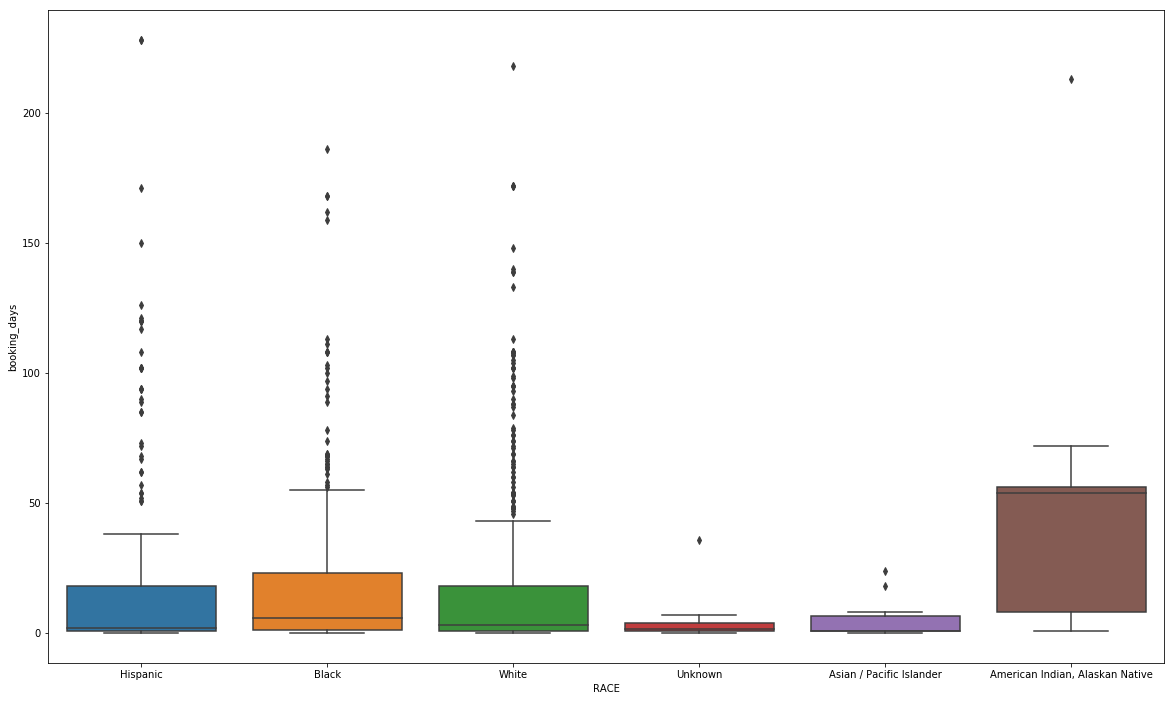

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.boxplot(df_no_warrant.RACE, df_no_warrant.booking_days)

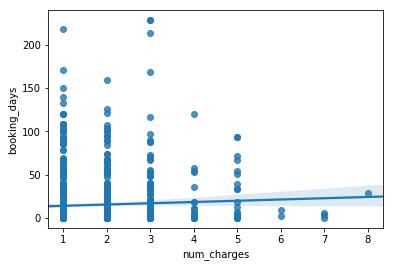

In [99]:
sns.regplot(df[df.trespass & ~df.warrant].num_charges, df[df.trespass & ~df.warrant].booking_days)

In [111]:
df[df.trespass & ~df.warrant ].shape[0]

1064

(array([ 297.,   50.,   25.,    7.,   27.,   14.,   13.,    3.,   18.,
           1.,    2.,    6.,    7.,    2.,    6.,    3.,    0.,    1.,
           1.,    3.,    2.,    2.,    2.,    2.,    4.,    0.,    0.,
           3.,    0.,    0.,    1.,    0.,    1.,    0.,    1.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([   0.  ,    4.36,    8.72,   13.08,   17.44,   21.8 ,   26.16,
          30.52,   34.88,   39.24,   43.6 ,   47.96,   52.32,   56.68,
          61.04,   65.4 ,   69.76,   74.12,   78.48,   82.84,   87.2 ,
          91.56,   95.92,  100.28,  104.64,  109.  ,  113.36,  117.72,
         122.08,  126.44,  130.8 ,  135.16,  139.52,  143.88,  148.24,
         152.6 ,  156.96,  161.32,  165.68,  170.04,  174.4 ,  178.76,
         183.12,  187.48,  191.84,  196.2 ,  200.56,  204.92,  209.28,
         213.64,  218.  ]),
 <a list of 50 Patch objects>)

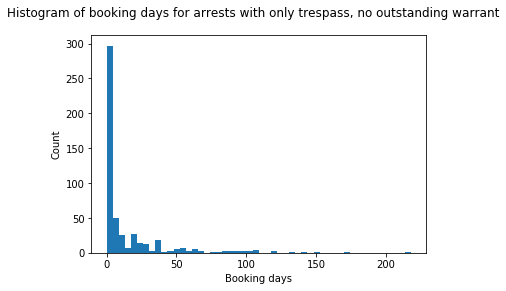

In [108]:
plt.suptitle('Histogram of booking days for arrests with only trespass, no outstanding warrant')
plt.xlabel('Booking days')
plt.ylabel('Count')
plt.hist(df[df.trespass & ~df.warrant & (df.num_charges == 1)].booking_days, bins=50)

In [117]:
df[df.trespass & ~df.warrant & (df.num_charges == 1)].booking_days.describe(percentiles=[.25, .5, .75, .9])

count    506.000000
mean      14.638340
std       27.279877
min        0.000000
25%        1.000000
50%        3.000000
75%       17.750000
90%       44.000000
max      218.000000
Name: booking_days, dtype: float64

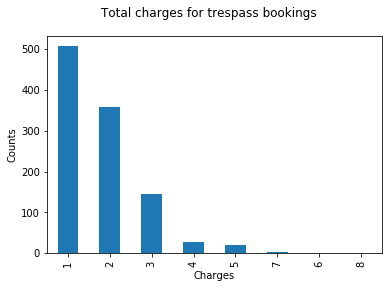

In [121]:
plt.suptitle('Total charges for trespass bookings')
plt.xlabel('Charges')
plt.ylabel('Counts')
df[df.trespass & ~df.warrant].num_charges.value_counts().plot(kind='bar')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


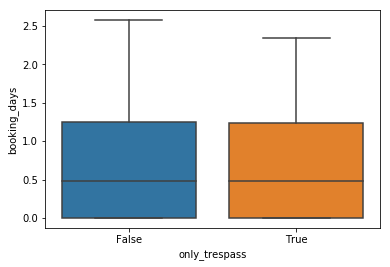

In [20]:
import numpy as np

sns.boxplot(df[df.trespass].only_trespass, np.log10(df.booking_days))

In [21]:
df[df.trespass].booking_days.describe()

count    1128.000000
mean       17.540780
std        35.854484
min         0.000000
25%         1.000000
50%         3.000000
75%        18.000000
max       373.000000
Name: booking_days, dtype: float64

In [25]:
df[df.booking_days == 373].iloc[0]['OFFENCE_DESCRIPTION/CASE']

'38-115 ~ Trespass,38-51.5 ~ Shoplifting,WARRANT ARREST'

In [6]:
df['OFFEN.DESCRIPTION (Check on DU Violations)'].value_counts()

38-115 ~ TRESPASS                                           1129
38-99 ~ URINATING IN PUBLIC                                   86
39-3 ~ PARK CURFEW                                            59
38-132 ~ AGGR PANHANDLING                                     47
54-548 ~ SOLICITING ON MEDIAN PROHIBITED                      24
38-123(B)(10) ~ PANHANDLING WITHIN 20' REST/BAR               16
38-86(A) ~ OBSTRUCTION OF STREETS OR PASSAGEWAYS              13
38-86 ~ LOITERING                                              6
38-132(B)(9) ~ PANHANDLING AFTER DARK                          4
38-132(B)(6) ~ PANHANDLING ON/NEAR PUBLIC TRANSPORTATION       4
38-132(B)(2) ~ PANHANDLING PRIVATE PROPERTY                    3
38-132(B)(7) ~ PANHANDLING WITHIN 6' OF ENTRANCE               2
54-459(A) ~ PARK/STOP IN ROADWAY                               1
38-132(B)(8) ~ PANHANDLING WITHIN 20' OF PAYPHONE              1
38-86(1)(B) ~ FAILURE TO OBEY ORDER/OBSTRUCT PASSAGE           1
Name: OFFEN.DESCRIPTION (

In [137]:
df['year'] = df.ARREST_DATE.apply(lambda x: x.year)
df['month'] = df.ARREST_DATE.apply(lambda x: x.month)

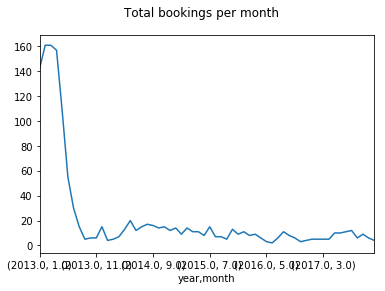

In [139]:
plt.suptitle('Total bookings per month')
df[~df.warrant].groupby(['year', 'month'])['booking_days'].count().plot()